In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('fpkm_table_normalized.csv') 
data = data.iloc[1:,1:]
mean = data.mean(axis=1)
stdev = data.std(axis=1)
data = data.subtract(mean, axis = 0)
data = data.divide (stdev, axis = 0)
data = data.transpose()
data = data.dropna(axis = 1)
data = data.dropna(axis = 0)

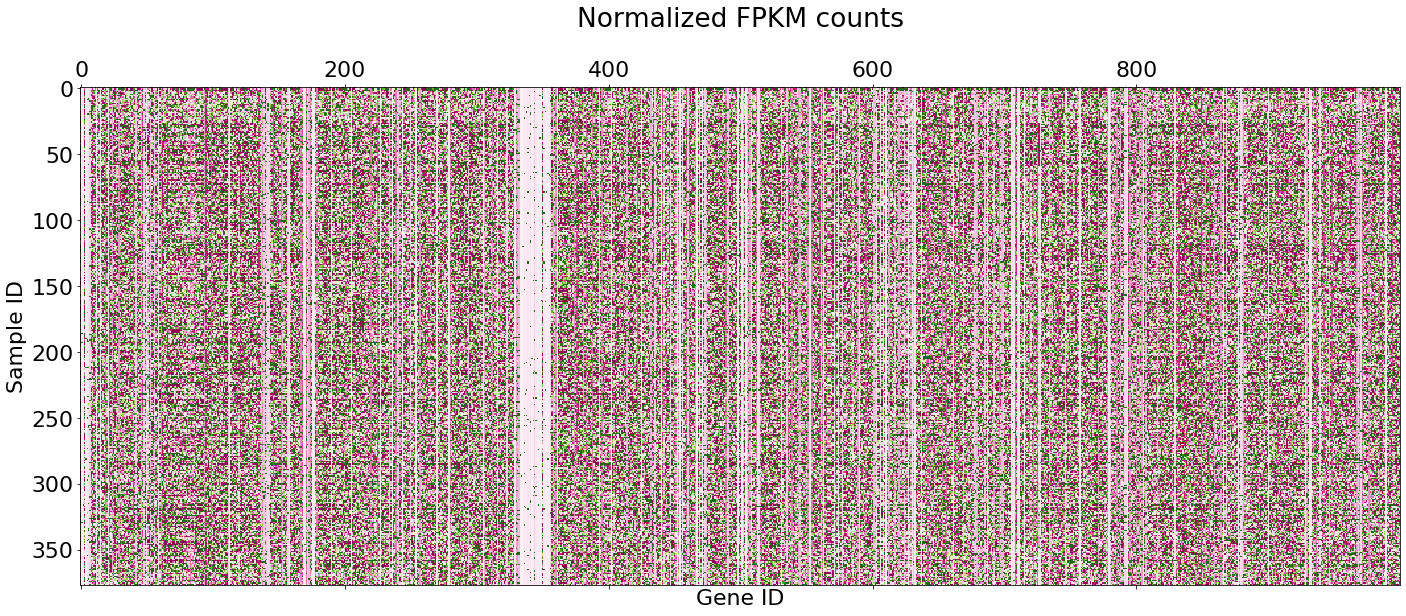

In [3]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (20,10))
im = ax.matshow(data.iloc[:, :1000], cmap = 'PiYG', vmin = -1, vmax = 1 )
ax.set_xlabel('Gene ID')
ax.set_ylabel('Sample ID')
ax.set_title('Normalized FPKM counts\n')
fig.tight_layout()
fig.savefig('datavisualization.png', bbox='tight')
#plt.show()